# The algorithm behind Google Search: an implementation with Python
https://medium.com/analytics-vidhya/the-algorithm-behind-google-search-an-implementation-with-python-d6418023bbd9   
“PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.”  


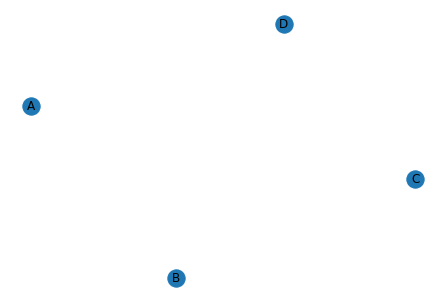

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
DG = nx.DiGraph()
DG.add_nodes_from("ABCD")
nx.draw(DG,with_labels=True)
plt.show()

In [3]:
pr=nx.pagerank(DG, alpha=0.85)
pr

{'A': 0.25, 'B': 0.25, 'C': 0.25, 'D': 0.25}

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


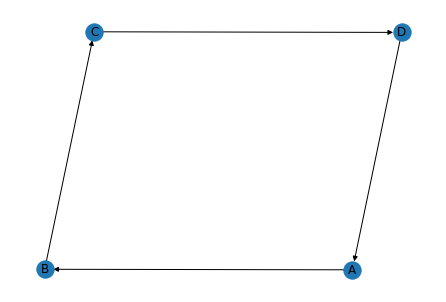

In [4]:
DG.add_weighted_edges_from([("A", "B", 1), ("B", "C", 1),("C","D",1),("D","A",1)]) 
nx.draw(DG,with_labels=True)
plt.show()

In [5]:
A=np.matrix([(0,0,0,1),(1,0,0,0),(0,1,0,0),(0,0,1,0)])
A

matrix([[0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0]])

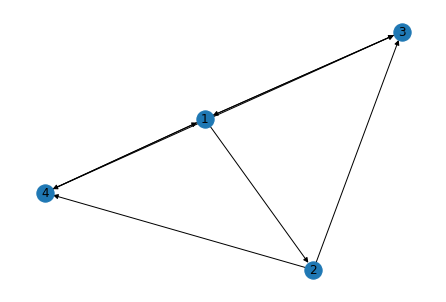

In [6]:
DG_test = nx.DiGraph()
DG_test.add_nodes_from([1,2,3,4])
DG_test.add_weighted_edges_from([(1,3,1), (1,4, 1),(1,2,1),(2,3,1),(2,4,1),(3,1,1),(4,1,1),(4,3,1)])
nx.draw(DG_test, with_labels=True)
plt.show()

In [7]:
B=np.matrix([(0,0,1,0.5),(1/3,0,0,0),(1/3,0.5,0,0.5),(1/3,0.5,0,0)])
B

matrix([[0.        , 0.        , 1.        , 0.5       ],
        [0.33333333, 0.        , 0.        , 0.        ],
        [0.33333333, 0.5       , 0.        , 0.5       ],
        [0.33333333, 0.5       , 0.        , 0.        ]])

In [8]:
pr=nx.pagerank(DG_test,alpha=1)
pr

{1: 0.38709615908859496,
 2: 0.12903204605249047,
 3: 0.29032302109901886,
 4: 0.193548773759895}

In [11]:
np.array((B**1000)*A.T)


array([[0.38709677, 0.38709677, 0.38709677, 0.38709677],
       [0.12903226, 0.12903226, 0.12903226, 0.12903226],
       [0.29032258, 0.29032258, 0.29032258, 0.29032258],
       [0.19354839, 0.19354839, 0.19354839, 0.19354839]])

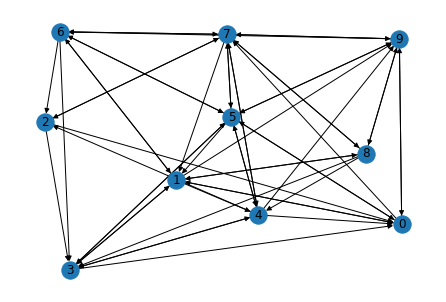

In [17]:
G=nx.fast_gnp_random_graph(10,0.5,directed=True)
nx.draw(G,with_labels=True)
plt.show()

In [18]:
pr=nx.pagerank(G,alpha=0.85)
rank_vector=np.array([[*pr.values()]])
best_node=np.argmax(rank_vector)
print("The most popular website is {}".format(best_node))

The most popular website is 7
